# **P4DS Final Project: An Analysis On Global Warming**
Huy G. Tong $^{1 *}$ \
$^{1}$ *Faculty of Information Technology, VNUHCM - University of Science, Vietnam*\
$^{*}$ *Student ID: 21127307*


#### **ABSTRACT**
This research analyses the publicly available records of global temperature to observe its change throughout history. This analysis can also help construct views on global warming. Additionally, the contribution of carbon dioxide gas in raising the Earth's surface temperature is also put into consideration. This `Notebook` presents the steps taken to process and visualize the data through a series of plots.

#### **TABLE OF CONTENTS**
[1. INTRODUCTION](#1-introduction)\
[2. METHOD](#2-method)\
[2.1. Data](#21-data)\
[2.2. Preprocessing](#22-preprocessing)\
[2.3. Analysis](#23-analysis)\
[2.3.1. Global surface temperature trend](#231-global-surface-temperature-trend)\
[2.3.2. Global warming: relation with greenhouse gas](#232-global-warming-relation-with-greenhouse-gas)\
[3. CONCLUSION](#3-conclusion)\
[REFERENCES](#references)

#### **1. INTRODUCTION**
The purpose of this study is to answer 2 main questions:

- **How has the globe's temperature changed throughout the years?** Answering this question will help us grasp the overall situation of the globe, thus acting as a foundation for future researches on the outlook, and solutions to the problem.

- **Are there any relation between global warming and the emission of greenhouse gas?** This help identify one of the possible cause of global warming. By doing so, nations can develop methods to stop or limit the effect of global warming.

Throughout this `Notebook`, I will describe the key ideas for processing and analysis of the data. I will also include my implementation of `Python` code to help with my analysis.

#### **2. METHOD**

In this section, I will describe in detail the steps used to perform the analysis on the dataset. I will also give a brief description of the data used in this project, as well as include the codes to help derive insightful information.

First, let us import the necessary packages, be sure to run the bellow cell at least once when executing this Notebook.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt

#### **2.1 Data**

I use [**Kaggle**](https://www.kaggle.com/) as the main source for finding usable datasets. 

The main dataset used in this research is the [**Climate Change: Earth Surface Temperature Data**](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data) dataset, made available publicly by *Berkeley Earth*. The files included in this dataset are `GlobalTemperatures.csv` and `GlobalLandTemperaturesByCountry.csv`.

I also make use of the [**CO2 Emissions**](https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country/data) published by *Ulrik Thyge Pedersen* for additional analysis of the $CO_{2}$-Temp relation. This dataset include 1 single file `co2_emissions_kt_by_country.csv`.

All data provided are licensed under Creative Commons 4.0, however the data provided by *Berkeley Earth* do not allow for commercial use.

In [2]:
globtemp = pd.read_csv("data/GlobalTemperatures.csv")
country_surftemp = pd.read_csv("data/GlobalLandTemperaturesByCountry.csv")
country_co2_emission = pd.read_csv("data/co2_emissions_kt_by_country.csv")

The `GlobalTemperatures` set have the following fiels:

- `dt`: date of measurement, starts in 1750 for average land temperature and 1850 for max and min land temperatures and global ocean and land temperatures, upto 2015

- `LandAverageTemperature`: global average land temperature in celsius

- `LandAverageTemperatureUncertainty`: the 95% confidence interval around the average

- `LandMaxTemperature`: global average maximum land temperature in celsius

- `LandMaxTemperatureUncertainty`: the 95% confidence interval around the maximum land temperature

- `LandMinTemperature`: global average minimum land temperature in celsius

- `LandMinTemperatureUncertainty`: the 95% confidence interval around the minimum land temperature

- `LandAndOceanAverageTemperature`: global average land and ocean temperature in celsius

- `LandAndOceanAverageTemperatureUncertainty`: the 95% confidence interval around the global average land and ocean temperature

Similarly, the `GlobalLandTemperaturesByCountry` set have the following fiels:

- `dt`: date of measurement (from 1743 to 2013)

- `AverageTemperature`: global average land temperature in celsius

- `AverageTemperatureUncertainty`: the 95% confidence interval around the average

- `Country`: country name

The `co2_emissions_kt_by_country` set includes:

- `country_code`: country code

- `country_name`: country name

- `year`: year of measurement (from 1960 to 2016)

- `value`: $CO_{2}$ Emissions in kiloton (kt)

To further process the available data, we can check the overall characteristics of each dataset using the function below.

In [3]:
def check_integrity(df):
    lost_percentage = df.isna().mean() * 100
    print(f"-- Number of rows: {df.shape[0]}")
    print(f"-- Number of columns: {df.shape[1]}")
    print(f"-- Have duplicated rows: {np.any(df.duplicated() == True)}")
    print(f"-- Lost percentage:")
    print(f"{lost_percentage}")

By utilizing that function, we can create a summary of our data.

*Global Temperature DF:*

In [4]:
print("Global Temperature DF:")
check_integrity(globtemp)

Global Temperature DF:
-- Number of rows: 3192
-- Number of columns: 9
-- Have duplicated rows: False
-- Lost percentage:
dt                                            0.000000
LandAverageTemperature                        0.375940
LandAverageTemperatureUncertainty             0.375940
LandMaxTemperature                           37.593985
LandMaxTemperatureUncertainty                37.593985
LandMinTemperature                           37.593985
LandMinTemperatureUncertainty                37.593985
LandAndOceanAverageTemperature               37.593985
LandAndOceanAverageTemperatureUncertainty    37.593985
dtype: float64


*Temperature by Country DF:*

In [5]:
print("Temperature by Country DF:")
check_integrity(country_surftemp)

Temperature by Country DF:
-- Number of rows: 577462
-- Number of columns: 4
-- Have duplicated rows: False
-- Lost percentage:
dt                               0.000000
AverageTemperature               5.654225
AverageTemperatureUncertainty    5.526251
Country                          0.000000
dtype: float64


*Global $CO_{2}$ emission DF:*

In [6]:
print("Global CO2 emission DF:")
check_integrity(country_co2_emission)

Global CO2 emission DF:
-- Number of rows: 13953
-- Number of columns: 4
-- Have duplicated rows: False
-- Lost percentage:
country_code    0.0
country_name    0.0
year            0.0
value           0.0
dtype: float64


To summary this part, all datasets do not have duplicated rows, the missing values in temperature measurement may be due to the lost records in the past. However, the missing values will not interfere with our analysis, since our goal is to look at the overall trends.

#### **2.2 Preprocessing**

First and foremost, I drop all the rows containing `NaN` values of the temperature sets. This simplifies the preprocessing step. However, `NaN` values of the `globtemp` set should only be removed after retaining the necessary columns

In [7]:
country_surftemp = country_surftemp.dropna(axis=0)

Next, for each dataframe, I convert the time columns to `datetime` format. 

For the global temperature dataframe, I only retain the average temperature and its uncertainty columns. Furthermore, I group all the dates into years and perform calculation for the annual mean temperature.

In [8]:
globtemp_annual = globtemp.copy()
globtemp_annual["dt"] = pd.to_datetime(globtemp_annual["dt"], format="%Y-%m-%d").dt.year
globtemp_annual = globtemp_annual[["dt", "LandAverageTemperature", "LandAverageTemperatureUncertainty"]]

# Drop NaN after retaining the needed columns
globtemp_annual = globtemp_annual.dropna(axis=0)

globtemp_annual = globtemp_annual.groupby("dt").mean().reset_index()
globtemp_annual.sample(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
166,1916,8.225250,0.260417
58,1808,7.626833,1.996833
105,1855,8.110750,0.887167


In [9]:
country_surftemp["dt"] = pd.to_datetime(country_surftemp["dt"], format="%Y-%m-%d")
country_surftemp.sample(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
318914,1972-10-01,23.348,0.381,Madagascar
243302,1981-01-01,-5.151,0.380,Iceland
137777,1890-09-01,12.553,0.316,Czech Republic


For the $CO_{2}$ emission data, I also retain only the `year` and `value` columns. I also group the data into years and calculate the annual average.

In [10]:
country_co2_emission["year"] = pd.to_datetime(country_co2_emission["year"], format="%Y").dt.year
co2_emission_annual = country_co2_emission[["year", "value"]]
co2_emission_annual = co2_emission_annual.groupby("year").mean().reset_index()
co2_emission_annual.sample(3)

,year,value
43,2003,872052.997190
24,1984,827727.431929
44,2004,919239.868215


#### **2.3 Analysis**

#### **2.3.1 Global surface temperature trend**

The surface temperature of the globe is visualized with the code cell bellow

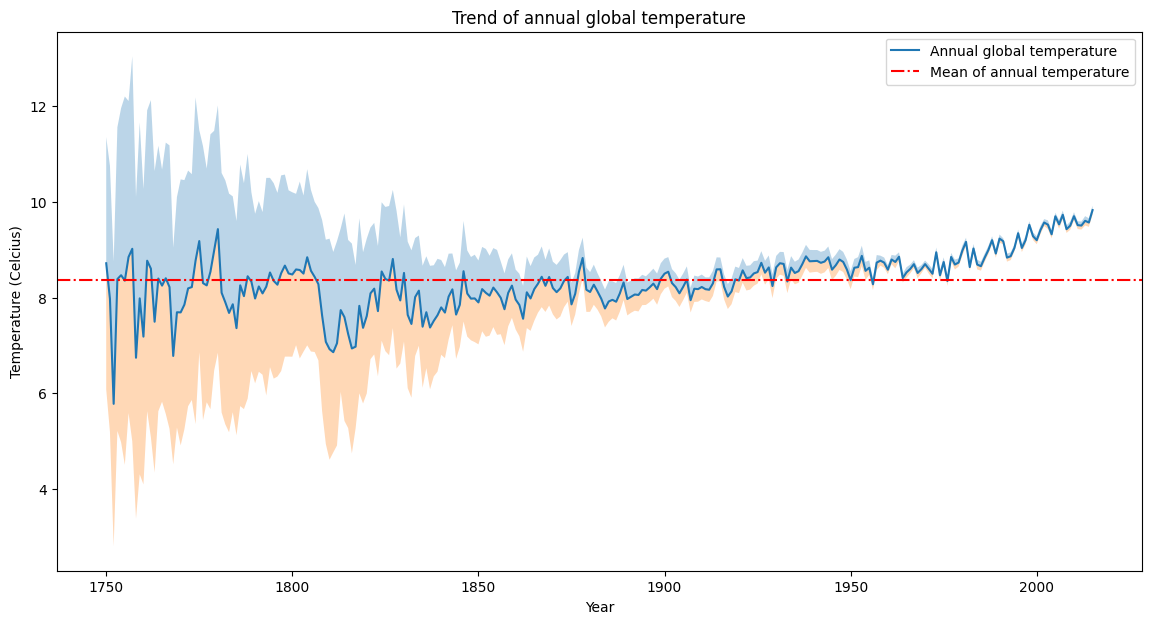

In [11]:
# Plot the annual temperature

years = globtemp_annual["dt"]

annual_avg = globtemp_annual["LandAverageTemperature"]
annual_uncertainty = globtemp_annual["LandAverageTemperatureUncertainty"]

plt.plot(years, annual_avg, label="Annual global temperature")
plt.fill_between(years, annual_avg, annual_avg + annual_uncertainty, alpha=0.3)
plt.fill_between(years, annual_avg, annual_avg - annual_uncertainty, alpha=0.3)

plt.axhline(annual_avg.mean(), color="red", linestyle="-.", label="Mean of annual temperature")

plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")
plt.title("Trend of annual global temperature")
plt.legend()

fig = plt.gcf()
fig.set_size_inches((14, 7))

plt.show()

From the time series plot, it is very easy to notice that the global temperature has risen in the recent years. Past recorded temperatures (from the 1700s to the 1980s), remained stable throughout the years. However as the end of the 20th century approached, the Earth observed a drastic change in temperature.

To observe the change in temperature more clearly, I select a sample of countries to see how their temperature changed throughout a century. First, I filter out the data within a period of time, in this case, all the national temperature measured from the year 1900 to 2013 will be analyzed. It is necessary to keep in mind that the nation-wise data is only available up to 2013.

To filter the rows, I apply a boolean mask to the entire data frame, as shown in the cell below.

In [12]:
year_min, year_max = 1900, 2013

country_surftemp = country_surftemp.loc[
    (country_surftemp["dt"].dt.year >= year_min)
    & (country_surftemp["dt"].dt.year <= year_max)
]

Next, I choose a few countries to examine. The sample countries should be within the same geographical region, as different regions will have different climate, thus the temperature range will be different.

There are 4 countries in my sample, all are located in the northern hemisphere, close to the polar region, thus having colder climate than the tropics. Since the original dataset provided nation-wise monthly temperature, further processing must be made to calculate the annual temperature of each nation. 

The code cell bellow will loop through each target country, calculate the annual temperature then plot it as a time series.

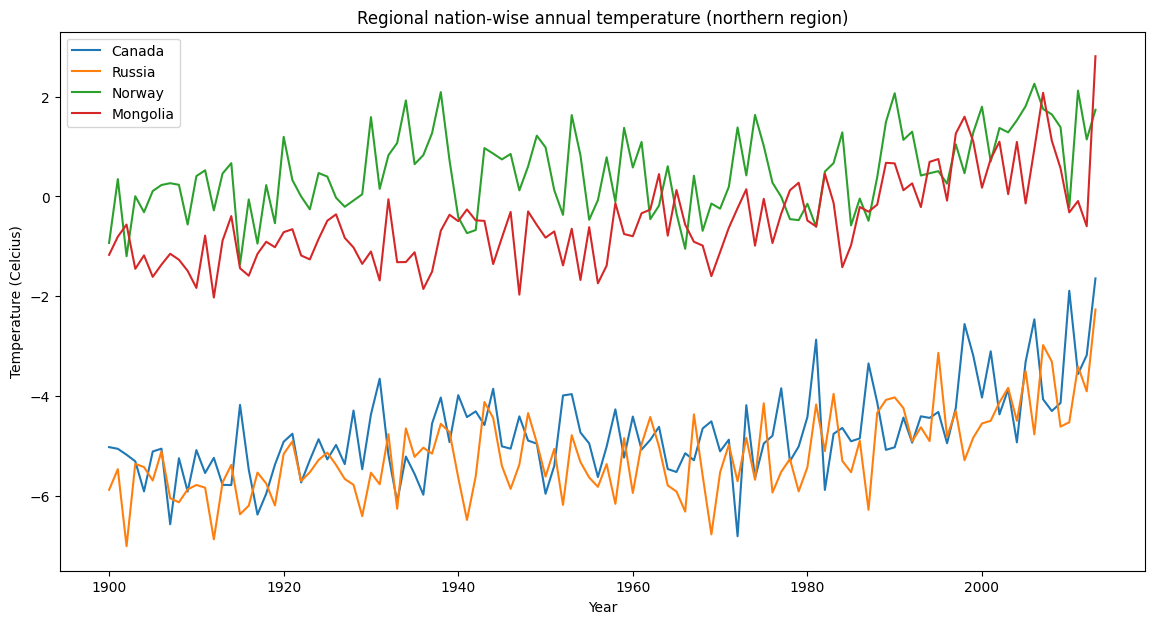

In [13]:
countries = ["Canada", "Russia", "Norway", "Mongolia"]

for country in countries:

    # Extract the rows of 1 country and retain the year and average temp
    nation_annual_temp = country_surftemp.loc[country_surftemp["Country"] == country]
    nation_annual_temp = nation_annual_temp[["dt", "AverageTemperature"]]

    # Calculate annual temperature
    nation_annual_temp["dt"] = nation_annual_temp["dt"].dt.year
    nation_annual_temp = nation_annual_temp.groupby("dt").mean().reset_index()

    plt.plot(
        nation_annual_temp["dt"], nation_annual_temp["AverageTemperature"],
        label=f"{country}"
    )

plt.xlabel("Year")
plt.ylabel("Temperature (Celcius)")
plt.title("Regional nation-wise annual temperature (northern region)")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(((14, 7)))

plt.show()

The sampled countries' temperature also showed signs of rising. Tho the change is visible throughout all samples, the data from Canada and Russia are more notable.

By examining the global and national trend, we can conclude that the Earth is going through **global warming**. Acknowledging this fact is an important step to work towards a solution for this matter.

#### **2.3.2. Global warming: relation with greenhouse gas**

Extensive researches have been conducted to pinpoint the cause of global warming, with greenhouse gases such as carbon dioxide ($CO_{2}$) becoming widely accepted as one of the leading causes.

To observe this relation, I use the `co2_emission_annual` along with the `globtemp_annual` dataset.

Since the datasets are recorded independently, the surveyed periods could be different. Therefore, I had to match the start and end years of each sets before plotting.

To perform this step of preprocessing, first I took the 2 timestamp endpoints of each dataset. Then by taking the `max` of the 2 initial timestamps and the `min` of the 2 ending years, I obtained the 2 endpoints of a period in which both datasets have valid values.

In [14]:
globtemp_year_min = globtemp_annual["dt"].min()
globtemp_year_max = globtemp_annual["dt"].max()

co2_emission_year_min = co2_emission_annual["year"].min()
co2_emission_year_max = co2_emission_annual["year"].max()

start_year = max(globtemp_year_min, co2_emission_year_min)
end_year = min(globtemp_year_max, co2_emission_year_max)

globtemp_matched = globtemp_annual.loc[
    (globtemp_annual["dt"] >= start_year) 
    & (globtemp_annual["dt"] <= end_year)
]

co2_emission_matched = co2_emission_annual.loc[
    (co2_emission_annual["year"] >= start_year) 
    & (co2_emission_annual["year"] <= end_year)
]

print(f"-- Matched data from year {start_year} to {end_year}")
print(f"-- Total of {end_year - start_year + 1} years")

-- Matched data from year 1960 to 2015
-- Total of 56 years


After preprocessing, the data is ready to be drawn on a plot. Since the temperature and $CO_{2}$ emission measurements have different unit, I make use of the dual-axis plot to draw the final figure.

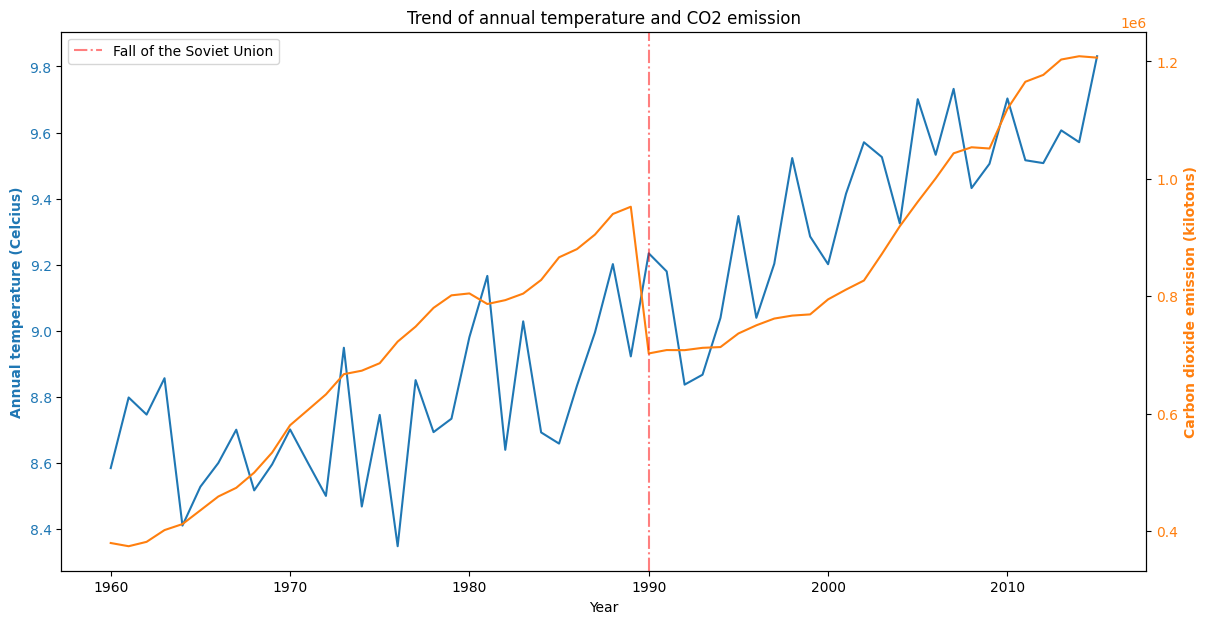

In [15]:
matched_years = np.arange(start_year, end_year + 1)

fig, ax_temp = plt.subplots()

ax_temp.plot(matched_years, globtemp_matched["LandAverageTemperature"], color="tab:blue")
ax_temp.set_xlabel("Year")
ax_temp.set_ylabel("Annual temperature (Celcius)", color="tab:blue", fontweight="bold")
ax_temp.set_title("Trend of annual temperature and CO2 emission")
ax_temp.tick_params(axis='y', labelcolor="tab:blue")

ax_co2 = ax_temp.twinx()
ax_co2.plot(matched_years, co2_emission_matched["value"], color="tab:orange")
ax_co2.set_ylabel("Carbon dioxide emission (kilotons)", color="tab:orange", fontweight="bold")
ax_co2.tick_params(axis='y', labelcolor="tab:orange")

plt.axvline(1990, color="red", alpha=0.5, linestyle="-.", label="Fall of the Soviet Union")

plt.legend()

fig = plt.gcf()
fig.set_size_inches((14, 7))

plt.show()

Upon initial inspection, we can see the 2 variables (temperature and $CO_{2}$ emission) correlates well since they follow roughly the same trend. This indicates a relation between the amount of greenhouse gas in the atmosphere with the recorded surface temperature.

There is 1 the anomaly in the greenhouse gas emission data, which is visible in the year 1990, when the emissions suddenly dropped. This is around the time of the Soviet Union's collapse, which had a huge impact on greenhouse gas emissions, as per [this article](https://science.ku.dk/english/press/news/2019/soviet-collapse-saved-the-atmosphere-from-7-billion-tonnes-of-co2/) by the University of Copenhagen and the work of [Schierhorn et al 2019](https://iopscience.iop.org/article/10.1088/1748-9326/ab1cf1). However, the annual temperature kept on rising, this is because carbon dioxide is not the only contributing factor to global warming. 

#### **3. CONCLUSION**
I summarize the answers to the questions proposed in Section 1 as follows:

**How has the globe's temperature changed throughout the years?**
- Answer: Throughout history, the Earth's temperature has remained stable up until the end of the 20th century. Due to industrial advancements, the globe has been warming since the 1980s and the overall trend is still rising.

**Are there any relation between global warming and the emission of greenhouse gas?** 
- Answer: Yes, temperature and greenhouse gas correlates well, since greenhouse gases are known to trap heat within the Eath's atmosphere. Thus, the more gas there is in the atmosphere, the higher the temperature will be. However, $CO_{2}$ is not the only contributing factor to global warming.

Global warming is an ongoing problem. Many scientists and researchers have dedicated a large amount of their time to make meaningful studies on its effects and ways to limit the impact. This project is a simple introduction to the topic, aimed to help people form a view on our changing world. 

There are still so many aspects of this field I have not the time to explore, such as the relation of effects of other greenhouse gases, as well as finding more recent and up-to-date dataset. Having the necessary data and proper analysis method is the key to a successful research project.

#### **REFERENCES**